# Census Income Project

Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df=pd.read_csv('census_income.csv')

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
#cheking shape of the dataset
df.shape

(32560, 15)

We have 32560 rows and 15 columns.

In [5]:
#cheking column names
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Independent variables:

Age

Workclass

Fnlwgt

Education

Education_num

Marital_status

Occupation

Relationship

Race

Sex

Capital_gain

Capital_loss

Hours_per_week

Native_country


Target variable:

Income

In [6]:
#Checking data type
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Age              - int64

Workclass        - object

Fnlwgt           - int64

Education        - object

Education_num    - int64

Marital_status   - object

Occupation       - object

Relationship     - object

Race             - object

Sex              - object

Capital_gain     - int64

Capital_loss     - int64

Hours_per_week   - int64

Native_country   - object

Income           - object

In [7]:
#Checking for null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

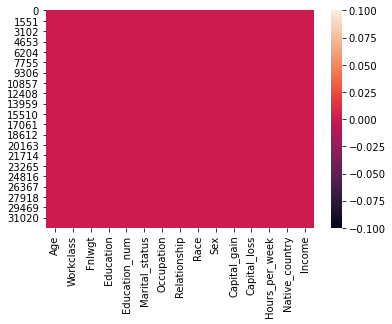

In [8]:
sns.heatmap(df.isnull())

No null values in our dataset.

In [9]:
#Checking unique values in the object data type columns
for i in df.columns:
    if df[i].dtypes== object:
        print(i,':')
        print(df[i].value_counts())
        print('\n')

Workclass :
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


Education :
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


Marital_status :
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


Occupation :
 Prof-spec

Their is a special character '?' in the following columns:-   Workclass,Occupation and Native_country

In [10]:
#Replacing '?' with null value
df.replace(' ?',np.NaN,inplace=True)

In [11]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

As all the null values are in categorical column we will replace them with the mode of the respective columns.

In [12]:
for i in ['Workclass','Occupation','Native_country']:
    df[i]=df[i].fillna(df[i].mode()[0])

In [13]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# Visualization:

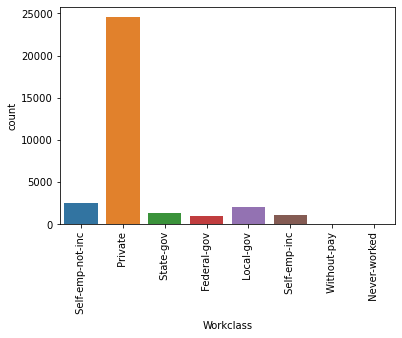

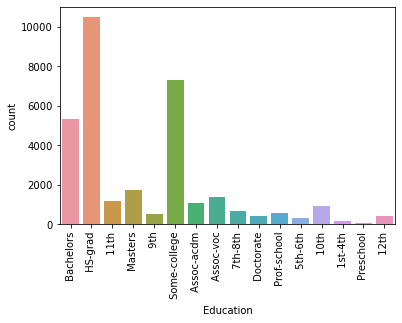

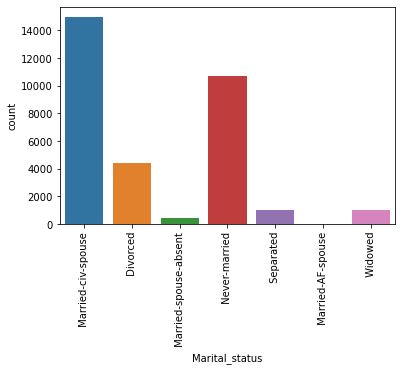

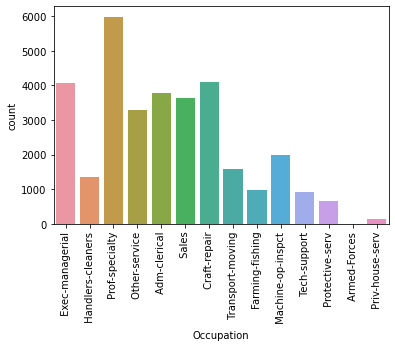

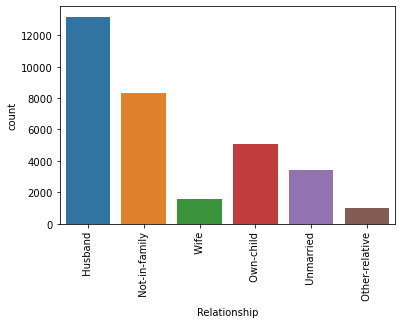

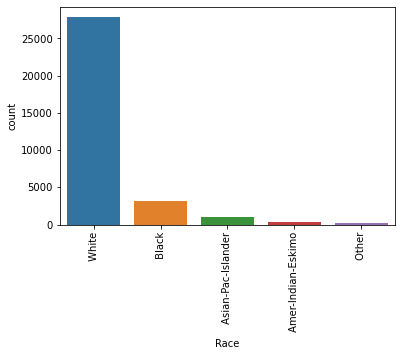

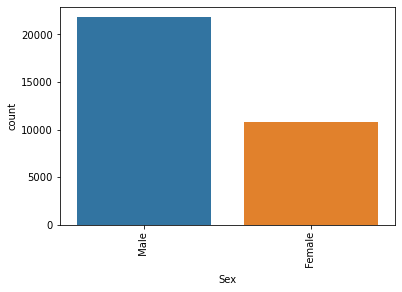

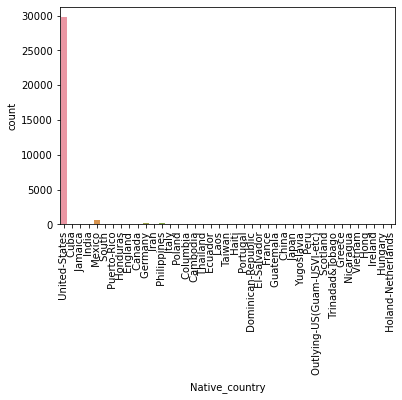

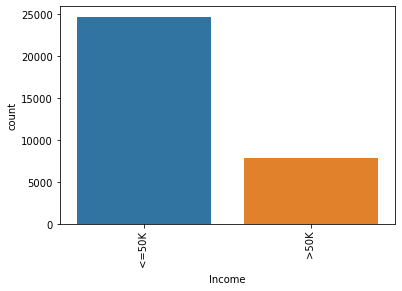

In [14]:
#Visualizing categorical columns
for i in df.columns:
    if df[i].dtypes==object:
        sns.countplot(df[i])
        plt.xticks(rotation=90)
        plt.show()

observations:
    
Most of the people work in private sector.

Most of the people have education upto HS-grad.

Marital status of most of the people is married-civ-spouse.

Prof-specialty is the most opted occupation.

Relationship of most of the people is husband.

Most of the people are white.

There are more male than females.

Majority of people are from United States.

Majority of people have income <=50k.

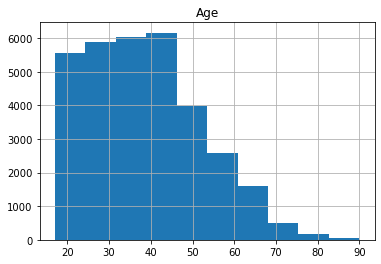

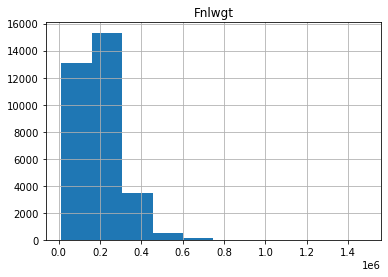

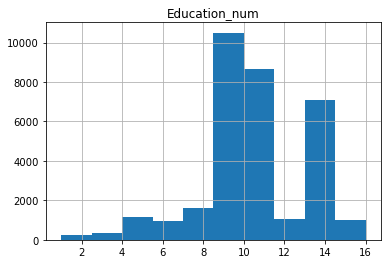

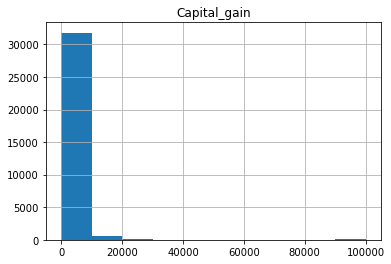

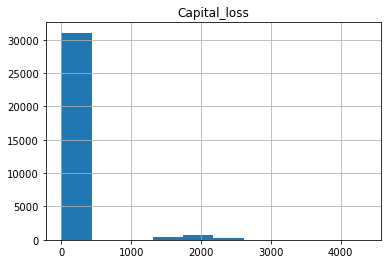

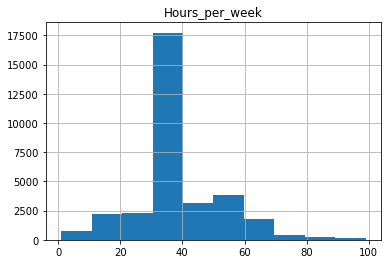

In [15]:
#Visualising numerical columns
for i in df.columns:
    if df[i].dtypes==np.int64:
        df[i].hist()
        plt.title(i)
        plt.show()
        

Observations:

Most of the people are aged from 38-45.

Capital gain and capital loss are 0 of majority of people and extreme values are present in both the columns.

Majority of people work 40 hrs a week.

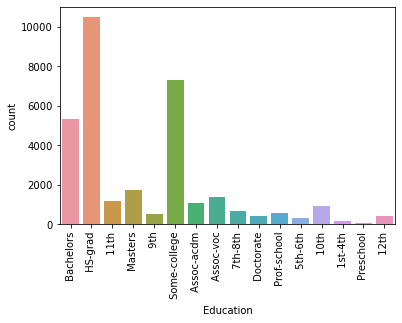

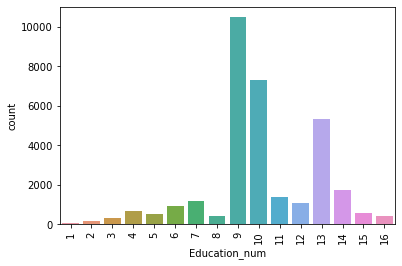

In [16]:
for i in ['Education','Education_num']:
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

In [17]:
for i in ['Education','Education_num']:
    print(i,':')
    print(df[i].value_counts())

Education :
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
Education_num :
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64


Education num is numerical representation of education with the same values, therfore we will drop the education column.

In [18]:
df.drop(columns='Education',axis=1,inplace=True)

In [19]:
df.shape

(32560, 14)

Now we have 32560 rows and 14 columns.

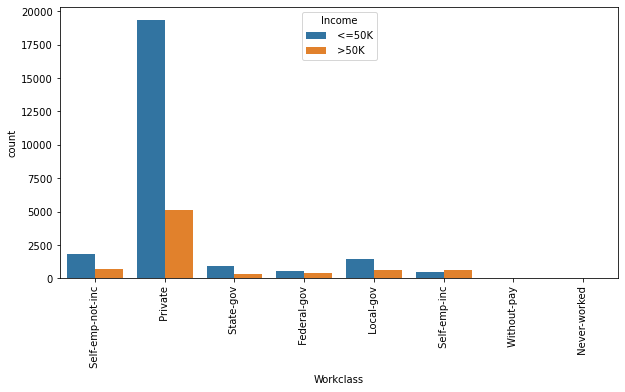

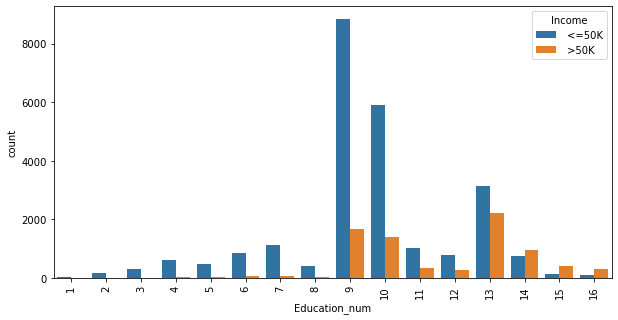

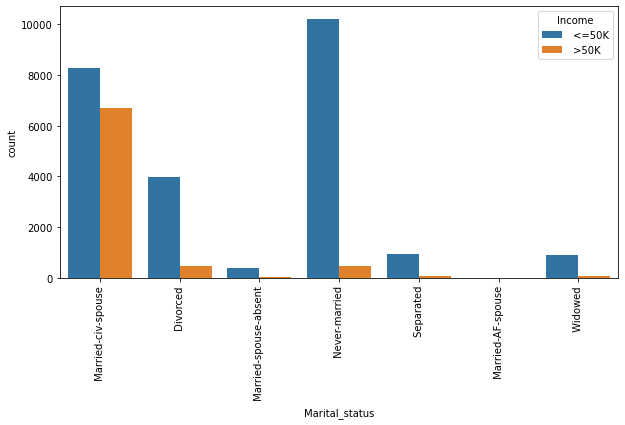

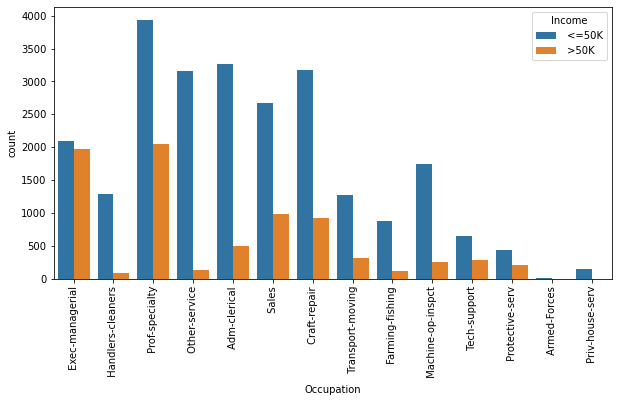

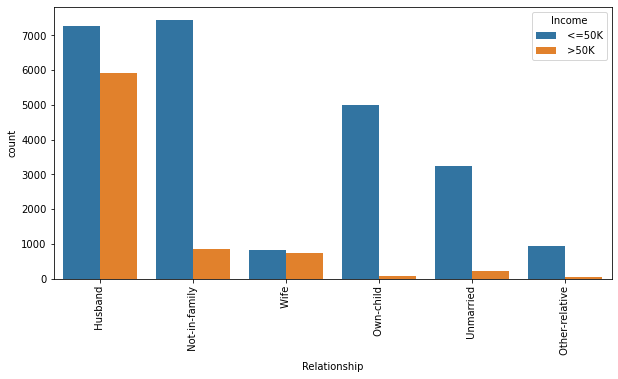

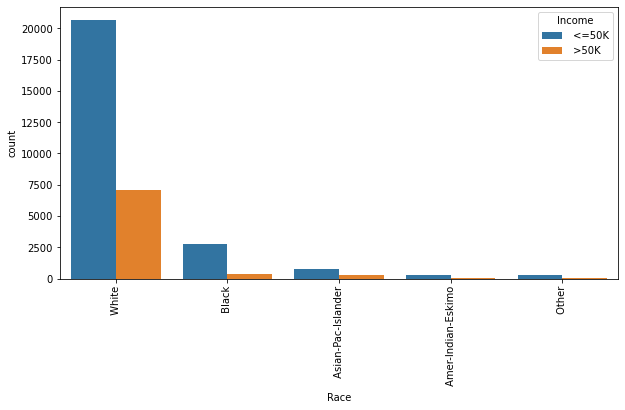

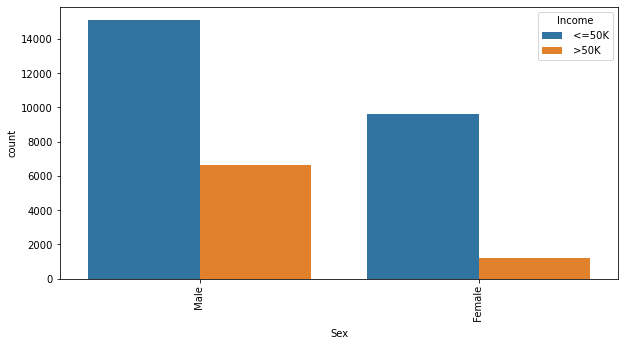

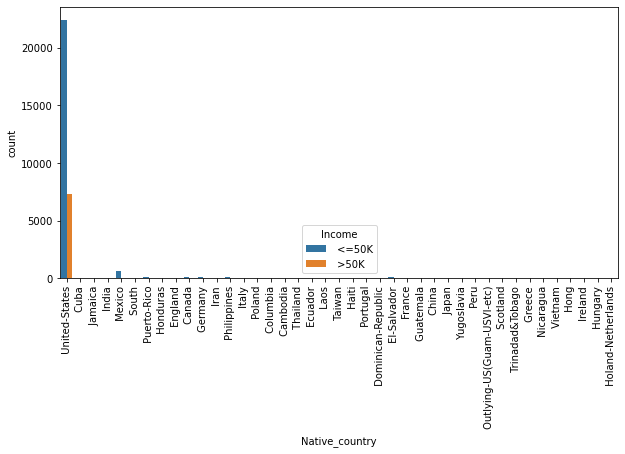

In [20]:
for i in ['Workclass','Education_num','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Native_country']:
    plt.figure(figsize=(10,5))
    sns.countplot(x=df[i],hue='Income',data=df)
    plt.xticks(rotation=90)
    plt.show()

Observations:

Proportion of people earning >50K than those who are earning less is high in self employed work class.

People with education level 13 earns the most.

Income of people with marital status married-civ-spouse have more income amongst others.

Exec-managerical and pro-specialty occupation have more income.

Male earns more than females.





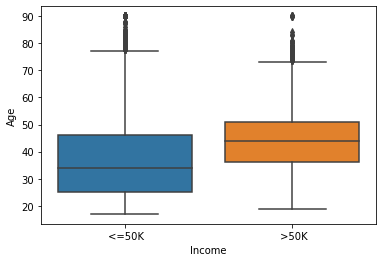

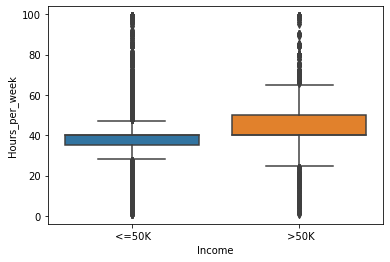

In [21]:
for i in ['Age','Hours_per_week']:
    sns.boxplot(x='Income',y=i,data=df)
    plt.show()

Most of the people who are  earning more than 50k are between 40-50 years.

In [22]:
#Converting categorical column into numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=le.fit_transform(df[i])

In [23]:
df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,14,2,3,5,4,0,0,0,40,38,0


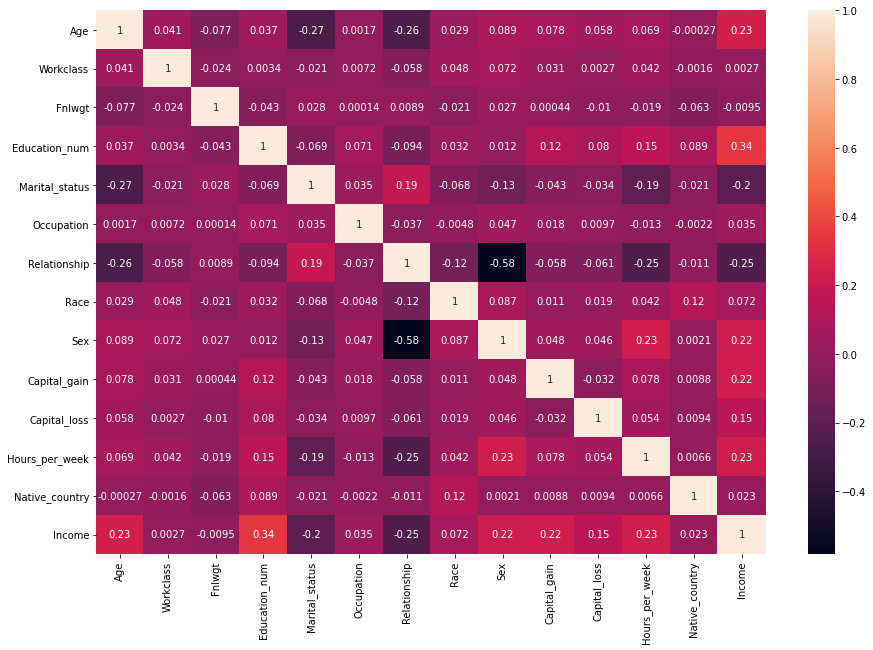

In [24]:
#Checking correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

There is strong correlation between the variables.

In [25]:
#droping fnlwgt (final weight) column as it doesnt contribute towards the target variable.
df.drop(columns='Fnlwgt',axis=1,inplace=True)

In [26]:
df.shape

(32560, 13)

In [27]:
df.describe()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.094349,10.080590,2.611794,6.138943,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.417107,0.240817
std,13.640642,1.107094,2.572709,1.506225,3.972623,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.056133,0.427586
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


Observations:

There are extreme values in capital loss and capital gain.

Maximum hours per week are 99hrs.

Minimum age is 17 years and maximum is 90 years.

In [30]:
#Seperating target and independent variable
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [31]:
x.shape, y.shape

((32560, 12), (32560,))

In [32]:
#Scaling data using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)
df_x=pd.DataFrame(df_x,columns=x.columns)

In [33]:
x=df_x

# Finfing the best random state:

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is',maxacc,'on random state', maxrs)

Best accuracy is 0.8319000819000819 on random state 47


In [35]:
#spliting train and test data at random state 47
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=47)

In [36]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((22792, 12), (9768, 12), (22792,), (9768,))

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [38]:
lr=LogisticRegression()
gnb=GaussianNB()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
svc=SVC()

In [39]:
model=[lr,gnb,rf,ada,knn,dtc,svc]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score:',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m, x, y, cv=5)
    print('Cross Validation Score:',score.mean())
    print('auc score:',roc_auc_score(y_test,pred))
    print('\n')

accuracy score: LogisticRegression()
0.8319000819000819
[[7046  413]
 [1229 1080]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      7459
           1       0.72      0.47      0.57      2309

    accuracy                           0.83      9768
   macro avg       0.79      0.71      0.73      9768
weighted avg       0.82      0.83      0.82      9768

Cross Validation Score: 0.8247235872235873
auc score: 0.7061827988673871


accuracy score: GaussianNB()
0.80999180999181
[[7126  333]
 [1523  786]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      7459
           1       0.70      0.34      0.46      2309

    accuracy                           0.81      9768
   macro avg       0.76      0.65      0.67      9768
weighted avg       0.80      0.81      0.78      9768

Cross Validation Score: 0.8025798525798526
auc score: 0.6478815242395399


accuracy score: RandomForestClassifier()

AdaBoost Classifier is performing best with accuracy of 86%, cross validation score of 85% and auc score of 77%. F1-score for 0 is 91% and for 1 is 68%.

# Hyper parameter tuning:

In [40]:
from sklearn.model_selection import GridSearchCV

In [47]:
parameters={'n_estimators':[50,100,200],'learning_rate':[0.001,0.01,0.1,0.2,0.5]}
GCV=GridSearchCV(ada,parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
                         'n_estimators': [50, 100, 200]})

In [48]:
#Lets check the best parameters
GCV.best_params_

{'learning_rate': 0.5, 'n_estimators': 200}

In [49]:
predgcv=GCV.best_estimator_.predict(x_test)
print('accuracy score:')
print(accuracy_score(y_test,predgcv))
print(confusion_matrix(y_test,predgcv))
print(classification_report(y_test,predgcv))
score=cross_val_score(GCV.best_estimator_, x, y, cv=5)
print('Cross Validation Score:',score.mean())
print('auc score:',roc_auc_score(y_test,predgcv))

accuracy score:
0.8658886158886159
[[7031  428]
 [ 882 1427]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7459
           1       0.77      0.62      0.69      2309

    accuracy                           0.87      9768
   macro avg       0.83      0.78      0.80      9768
weighted avg       0.86      0.87      0.86      9768

Cross Validation Score: 0.8627764127764127
auc score: 0.7803180557249851


After tuning our model we have accuracy of 87%, cross val score of 86% and auc score of 78%.

F1- score for 1 is increased, now it is 69% and for 0 it is the same i.e, 91%.

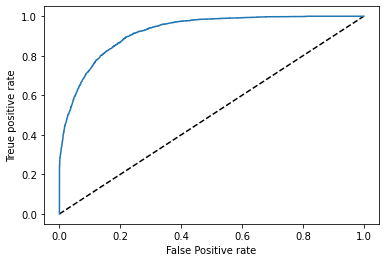

In [50]:
#Plotting the auc_roc curve
y_pred_prob=GCV.best_estimator_.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost Classifier')
plt.xlabel('False Positive rate')
plt.ylabel('Treue positive rate')
plt.show()

By looking at the plot and the area under the curve we can say that our model is performing well.

In [51]:
#Lets save our model
import joblib
joblib.dump(GCV.best_estimator_,'census_income_adaboost.obj')

['census_income_adaboost.obj']